In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# !pip install faker

A project that involves analyzing data on consumer spending can help distinguish between real variablity in spending pattern and random Variability.This Can Inform Target marketing strategies.

In [16]:
dataframe=pd.read_csv("SalesForCourse_quizz_table.csv")
dataframe

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,02/07/16,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN
34863,34863,03/13/15,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN
34864,34864,04/05/15,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN
34865,34865,08/30/15,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN


# Random Analysis 


Adding payment method it will be required in analyzing customer spending pattern

In [21]:
import numpy as np

# List of payment methods
payment_methods = ["credit card","cash","mobile payment","DebitCard"]

# Randomly distribute payment method
dataframe['Payment_Method'] = np.random.choice(payment_methods, size=len(dataframe))


In [35]:
freq={}
for i in dataframe['Payment_Method']:
    if i in freq:
        freq[i]+=1
    else:
        freq[i]=1
freq

{'DebitCard': 8586, 'credit card': 8763, 'mobile payment': 8780, 'cash': 8738}

In [27]:
dataframe['Payment_Method'].value_counts()

mobile payment    8780
credit card       8763
cash              8738
DebitCard         8586
Name: Payment_Method, dtype: int64

In [40]:
len(dataframe['Customer Age'].unique())

71

In [45]:
dataframe['Customer Age'].min()

17.0

In [46]:
dataframe['Customer Age'].max()

87.0

In [55]:
t=0
for i in dataframe['Customer Age']:
    if 18<i<25:
        t+=1
t

4349

In [41]:
dataframe['Column1'].unique()

array([        nan, 2370.      ,  398.      , ..., 1971.      ,
       1568.      ,  687.344828])

Question No 1

What is the distribution of customer spending in our business? How does it vary by customer segment and over time?

Steps For Solving this Question

# STEP 1

In [42]:
# Customer spending by segment. We segment the data on the base of change and check the variation that what type of age group spend more

In [133]:
#cleaning of data filling and dropping

Using pd.cut() to segment data can be helpful when you want to divide a continuous numerical variable into discrete categories for analysis. It's often used in conjunction with groupby() to summarize data by category,

In [50]:
#Customer Spending age segment
dataframe["Age Segment"]=pd.cut(dataframe['Customer Age'],bins=[0,25,35,50,100],labels=["18-25",'25-35','36-50','50+'])
dataframe

,index,Date,Year,Month,Customer Age,Customer Gender,Country,State,Product Category,Sub Category,Quantity,Unit Cost,Unit Price,Cost,Revenue,Column1,Payment_Method,Age Segment
0,0,02/19/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,1.0,80.00,109.000000,80.0,109.000000,NaN,DebitCard,25-35
1,1,02/20/16,2016.0,February,29.0,F,United States,Washington,Clothing,Gloves,2.0,24.50,28.500000,49.0,57.000000,NaN,credit card,25-35
2,2,02/27/16,2016.0,February,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,3.67,5.000000,11.0,15.000000,NaN,mobile payment,25-35
3,3,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,2.0,87.50,116.500000,175.0,233.000000,NaN,mobile payment,25-35
4,4,03/12/16,2016.0,March,29.0,F,United States,Washington,Accessories,Tires and Tubes,3.0,35.00,41.666667,105.0,125.000000,NaN,cash,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34862,34862,02/07/16,2016.0,February,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,2.0,1160.00,985.500000,2320.0,1971.000000,NaN,cash,36-50
34863,34863,03/13/15,2015.0,March,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2049.00,1583.000000,2049.0,1583.000000,NaN,cash,36-50
34864,34864,04/05/15,2015.0,April,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,3.0,683.00,560.666667,2049.0,1682.000000,NaN,mobile payment,36-50
34865,34865,08/30/15,2015.0,August,38.0,M,France,Hauts de Seine,Bikes,Mountain Bikes,1.0,2320.00,1568.000000,2320.0,1568.000000,NaN,cash,36-50


In [57]:
#Now Calculating the spending depend on the age segment
AgeSegmentSpending=dataframe.groupby('Age Segment')["Revenue"].sum()
AgeSegmentSpending

Age Segment
18-25    3141072.0
25-35    8028242.0
36-50    8556148.0
50+      2619114.0
Name: Revenue, dtype: float64

# STEP 2

Describe the distribution of spending by descriptive statistics

In [59]:
DescriptiveStats=dataframe.groupby('Age Segment')["RRevenue"].describe()
DescriptiveStats

,count,mean,std,min,25%,50%,75%,max
Age Segment,,,,,,,,
18-25,6076.0,516.963792,636.803517,2.0,84.0,222.0,729.00,4550.0
25-35,11826.0,678.863690,743.035003,2.0,116.0,392.0,960.75,4113.0
36-50,12696.0,673.924701,770.476732,2.0,106.0,335.0,962.25,5082.0
50+,4268.0,613.663074,728.402087,2.0,92.0,285.5,848.00,4266.0


As we can see that std is bigger than mean because std is highly sensitive by outliers and by seeing rougly we can clearly see that there is huge difference between max and remaining quantiles. We can also see by visualizing the data

In [132]:
#Checking the distribution of data by rough analysis
#Difference Between the min and max and assuming outliers

In [114]:
ff=dataframe.groupby('Age Segment')["Revenue"]

In [115]:
a18_25=[]
for i in ff:
    if i[0]=='18-25':
        a18_25.append(i[1])
max(a18_25[0])

4550.0

In [116]:
a18_25_Out=0
for i in a18_25[0]:
    if i>=4000:
        a18_25_Out+=1
a18_25_Out      

1

In [121]:
a25_35=[]
for i in ff:
    if i[0]=='25-35':
        a25_35.append(i[1])

In [123]:
a25_35_Out=0
for i in a25_35[0]:
    if i>=4000:
        a25_35_Out+=1
        print(i)
a25_35_Out      

4113.0


1

In [126]:
a36_50=[]
for i in ff:
    if i[0]=='36-50':
        a36_50.append(i[1])
a36_50

[79        873.0
 80        751.0
 81       2340.0
 82        707.0
 83       2340.0
           ...  
 34861    1487.0
 34862    1971.0
 34863    1583.0
 34864    1682.0
 34865    1568.0
 Name: Revenue, Length: 12696, dtype: float64]

In [131]:
a36_50_Out=0
for i in a36_50[0]:
    if i>4500:
        a36_50_Out+=1
        print(i)
a36_50_Out

4923.0
5082.0


2

# STEP 3

Use visualization such as histo or boxplot to visualize the pattern and the distribution and patterns

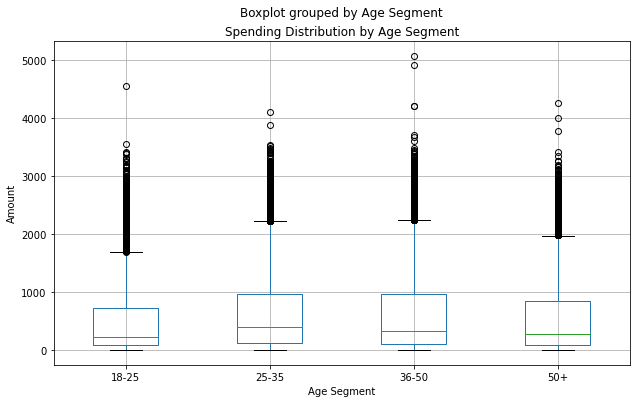

In [141]:
fig, ax = plt.subplots(figsize=(10,6)) # Set figure size to 10x6 inches
dataframe.boxplot(column='Revenue', by='Age Segment', ax=ax)
ax.set_title('Spending Distribution by Age Segment')
ax.set_xlabel('Age Segment')
ax.set_ylabel('Amount')
plt.show()

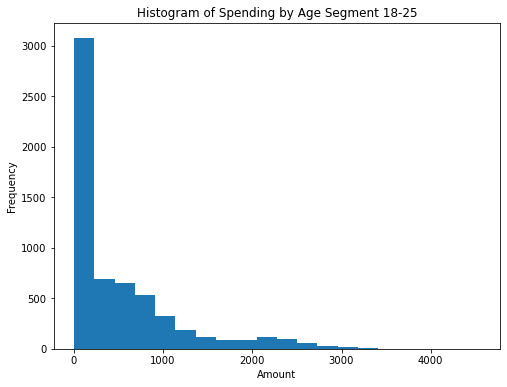

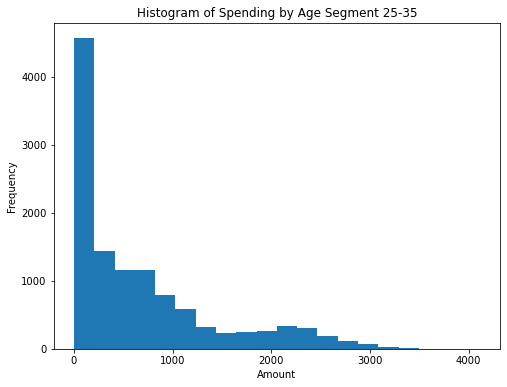

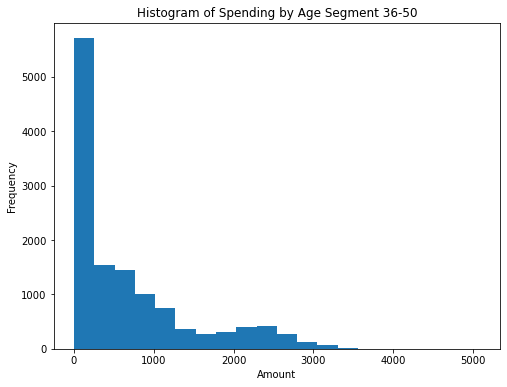

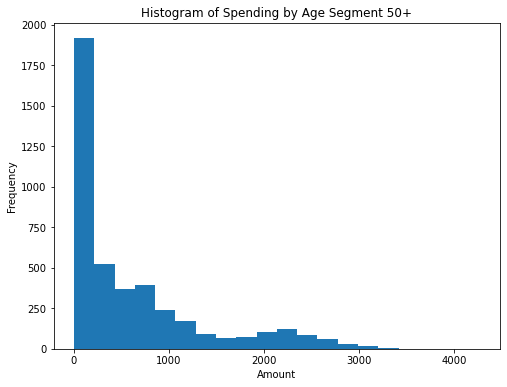

In [154]:
for label, grp in dataframe.groupby('Age Segment'):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.hist(grp['Revenue'], bins=20)
    ax.set_title(f'Histogram of Spending by Age Segment {label}')
    ax.set_xlabel('Amount')
    ax.set_ylabel('Frequency')
    plt.show()


In [156]:
dataframe.isnull().sum()

index                   0
Date                    1
Year                    1
Month                   1
Customer Age            1
Customer Gender         1
Country                 1
State                   1
Product Category        1
Sub Category            1
Quantity                1
Unit Cost               1
Unit Price              1
Cost                    1
Revenue                 0
Column1             32293
Payment_Method          0
Age Segment             1
dtype: int64